In [1]:
# https://medium.com/coinmonks/cryptocurrency-price-prediction-using-deep-learning-f738ead48ffd

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
sys.path.append("..")
from data import Data
from NN_models import RNN

In [2]:
data = Data("BTC")
data.load_data()
data.create_RNN_data(reg='Price')
data.df

,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberofTrade,TakerbuybaseV,TakerbuyquoteV,...,binance,peterlbrandt,apompliano,cashapp,raoulgmi,tyler,squawkcnbc,scottmelker,Close_std,Close_ret
6,4040.00,4265.80,4013.89,4114.01,1001.136565,1503532799999,4.148686e+06,8629,309.419092,1.293567e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.717642,NaN
17,4508.50,4714.76,4298.33,4509.08,691.216198,1504483199999,3.121053e+06,6022,258.934536,1.169645e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.688416,0.091695
18,4505.00,4527.49,3972.51,4100.11,1394.644614,1504569599999,5.909947e+06,9317,578.600851,2.460363e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.718670,-0.095079
19,4106.97,4484.99,3603.00,4366.47,1228.938157,1504655999999,5.083453e+06,10084,533.476065,2.214298e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.698966,0.062941
20,4366.49,4662.87,4335.26,4619.77,807.363726,1504742399999,3.626346e+06,7956,422.923063,1.903232e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.680227,0.056390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,59998.80,61300.00,59350.59,59860.00,56375.037117,1618271999999,3.393043e+09,1806298,27645.201153,1.664589e+09,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.406341,0.001519
1335,59860.01,63777.77,59805.15,63575.00,82848.688746,1618358399999,5.154877e+09,2703735,41662.533028,2.592724e+09,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.681169,0.060212
1336,63575.01,64854.00,61301.00,62959.53,82616.343993,1618444799999,5.239081e+09,2645625,40070.377527,2.542171e+09,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.635638,-0.009728
1337,62959.53,63800.00,62020.00,63159.98,51649.700340,1618531199999,3.248932e+09,1938028,25628.168379,1.612303e+09,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.650467,0.003179


### start training for 100 epochs
### training finish 



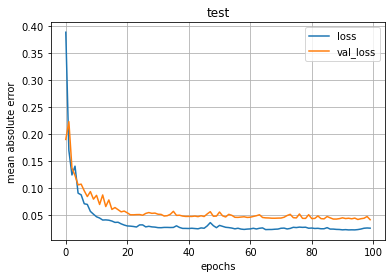

Out of sample performance:
3/3 - 1s - loss: 0.0417 - mae: 0.0417 - mse: 0.0037 - r_square: 0.8120


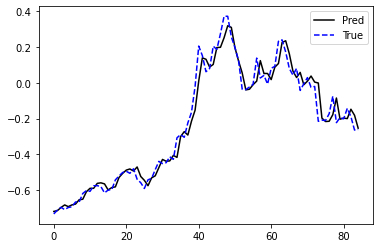

In [3]:
model=RNN()

model.create_model(data,architecture=[64,64,32])
model.train_model(data,verbose=0,epoch=100)
model.show_performance(label_='test',data=data)
pred=model.model(data.X_te)


plt.plot(pred.numpy().flatten(),color='k',label='Pred')
plt.plot(data.y_te.flatten(),color='blue',linestyle='--',label='True')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


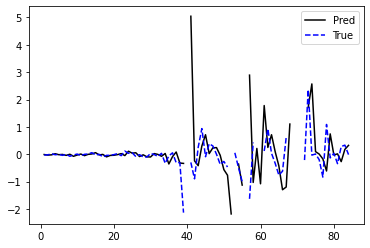

In [9]:
df = pd.DataFrame({'pred':pred.numpy().flatten(),'y':data.y_te.flatten()})
for c in df.columns:
    df[c+'_l'] = df[c].shift(1)
    df[c+'_ret'] = np.log(df[c]/df[c+'_l'])

plt.plot(df['pred_ret'],color='k',label='Pred')
plt.plot(df['y_ret'],color='blue',linestyle='--',label='True')
plt.legend()
plt.show()

In [85]:
df = pd.read_csv('../data/processed/BTC_finaldb.csv')
df = df.iloc[:,1:]
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'CloseTime',
       'QuoteAssetVolume', 'NumberofTrade', 'TakerbuybaseV', 'TakerbuyquoteV',
       'date', 'tweet_count', 'daily_sent', 'elonmusk', 'michael_saylor',
       'binance', 'peterlbrandt', 'apompliano', 'cashapp', 'raoulgmi', 'tyler',
       'squawkcnbc', 'scottmelker'],
      dtype='object')

In [70]:
df.dtypes

Open                float64
High                float64
Low                 float64
Close               float64
Volume              float64
CloseTime             int64
QuoteAssetVolume    float64
NumberofTrade         int64
TakerbuybaseV       float64
TakerbuyquoteV      float64
date                 object
tweet_count         float64
daily_sent          float64
elonmusk            float64
michael_saylor      float64
binance             float64
peterlbrandt        float64
apompliano          float64
cashapp             float64
raoulgmi            float64
tyler               float64
squawkcnbc          float64
scottmelker         float64
dtype: object

In [18]:
target_col = 'Close'
dataset = df[['Close','Volume']].copy()

def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

train, test = train_test_split(dataset, test_size=0.2)

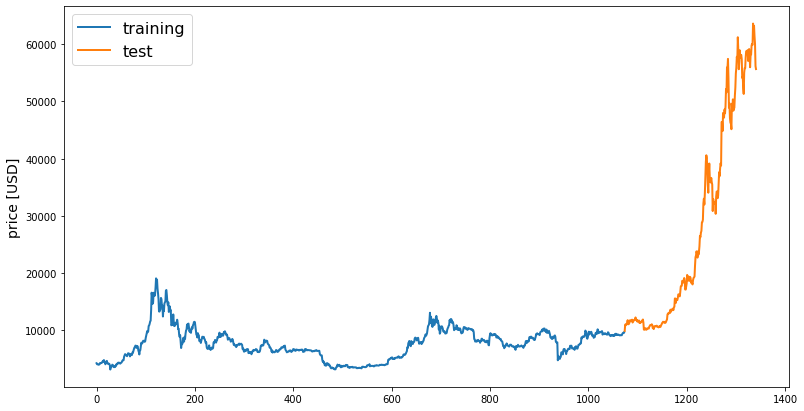

In [19]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [USD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)
    
line_plot(train[target_col], test[target_col], 'training', 'test', title='')

In [23]:
!pip install tqdm

  Using cached https://files.pythonhosted.org/packages/72/8a/34efae5cf9924328a8f34eeb2fdaae14c011462d9f0e3fcded48e1266d1c/tqdm-4.60.0-py2.py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.


In [29]:
dataset.dtypes

Close     float64
Volume    float64
dtype: object

In [25]:
from tqdm import tqdm
from tensorflow.keras.regularizers import L1L2

# utiliser un scaler => permet de revenir plus facilement en arrière
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (df.max() - df.min())

def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in tqdm(range(len(df) - window_len)):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    print("finish extract data")
    return np.array(window_data)

def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1
    print("finish preparing data")
    return train_data, test_data, X_train, X_test, y_train, y_test

In [43]:
def build_lstm_model(input_data, output_size, neurons=100, activ_func='linear', dropout=0.2, loss='mse'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape =(input_data.shape[1],input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    optimizer = optimizers.Adam(
    learning_rate=1e-4)
    model.compile(loss=loss, optimizer=optimizer)
    
    return model

np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 100
epochs = 10
batch_size = 32
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

train, test, X_train, X_test, y_train, y_test = prepare_data(dataset, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)
model = build_lstm_model(X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss)
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

100%|██████████| 263/263 [00:00<00:00, 1063.78it/s]
finish extract data
finish preparing data
Epoch 1/10
34/34 [==============================] - 3s 9ms/step - loss: 0.0119
Epoch 2/10
34/34 [==============================] - 0s 9ms/step - loss: 0.0112
Epoch 3/10
34/34 [==============================] - 0s 11ms/step - loss: 0.0094
Epoch 4/10
34/34 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 5/10
34/34 [==============================] - 0s 9ms/step - loss: 0.0084
Epoch 6/10
34/34 [==============================] - 0s 8ms/step - loss: 0.0086
Epoch 7/10
34/34 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 8/10
34/34 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 9/10
34/34 [==============================] - 0s 12ms/step - loss: 0.0081
Epoch 10/10
34/34 [==============================] - 0s 9ms/step - loss: 0.0059


In [41]:
history.history['loss'].plot()

AttributeError: 'list' object has no attribute 'plot'

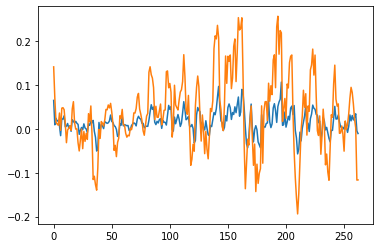

In [46]:
pred = model.predict(X_test) # essayer de revenir en arrière avec la normalisation + créer un pipeline
plt.plot(pred)
plt.plot(y_test)

In [50]:
preds = test[target_col].values[:-window_len] * (pred + 1)
line_plot(test, preds, 'actual', 'prediction', lw=3)
preds = pd.Series(index=test.index, data=preds)

ValueError: Length of passed values is 263, index implies 268.

In [61]:
preds = test[target_col].values[:-window_len] * (preds + 1)
line_plot(targets, preds, 'actual', 'prediction', lw=3)
preds = pd.Series(index=targets.index, data=preds)

ValueError: Length of passed values is 263, index implies 1342.

In [66]:
df.dtypes

Close     float64
Volume    float64
date        int64
dtype: object

In [73]:
df['date'] = pd.to_datetime(df['date'])
df['date']

<ipython-input-73-1527c25da1ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


0      2017-08-17
1      2017-08-18
2      2017-08-19
3      2017-08-20
4      2017-08-21
          ...    
1337   2021-04-15
1338   2021-04-16
1339   2021-04-17
1340   2021-04-18
1341   2021-04-19
Name: date, Length: 1342, dtype: datetime64[ns]

Training
######### ret ########
Epoch 1/5
35/35 [==============================] - 6s 61ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 2/5
35/35 [==============================] - 2s 52ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 3/5
35/35 [==============================] - 1s 38ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 4/5
35/35 [==============================] - 1s 40ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 5/5
35/35 [==============================] - 3s 77ms/step - loss: 0.0016 - val_loss: 0.0010
In sample performance
5/5 [==============================] - 0s 20ms/step - loss: 0.0020


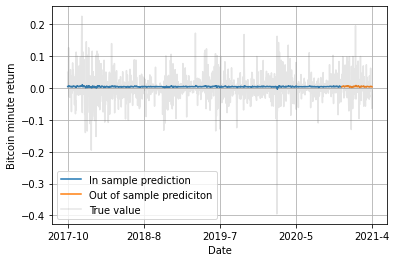

Training
######### price ########
Epoch 1/5
35/35 [==============================] - 9s 137ms/step - loss: 0.0504 - val_loss: 0.0168
Epoch 2/5
35/35 [==============================] - 3s 74ms/step - loss: 0.0066 - val_loss: 0.0077
Epoch 3/5
35/35 [==============================] - 2s 46ms/step - loss: 0.0058 - val_loss: 0.0072
Epoch 4/5
35/35 [==============================] - 2s 53ms/step - loss: 0.0051 - val_loss: 0.0070
Epoch 5/5
35/35 [==============================] - 1s 39ms/step - loss: 0.0054 - val_loss: 0.0053
In sample performance
5/5 [==============================] - 0s 10ms/step - loss: 0.3651


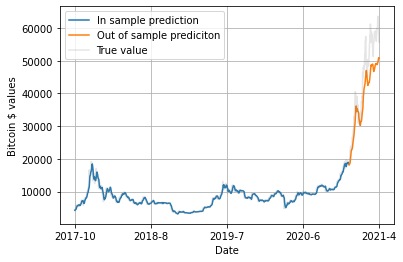

Training
######### abs ########
Epoch 1/5
35/35 [==============================] - 7s 106ms/step - loss: 0.0013 - val_loss: 5.6120e-04
Epoch 2/5
35/35 [==============================] - 2s 70ms/step - loss: 8.1149e-04 - val_loss: 5.3273e-04
Epoch 3/5
35/35 [==============================] - 2s 63ms/step - loss: 9.7330e-04 - val_loss: 5.4526e-04
Epoch 4/5
35/35 [==============================] - 2s 64ms/step - loss: 8.2875e-04 - val_loss: 5.9941e-04
Epoch 5/5
35/35 [==============================] - 2s 71ms/step - loss: 8.5364e-04 - val_loss: 5.3312e-04
In sample performance
5/5 [==============================] - 0s 16ms/step - loss: 9.4928e-04


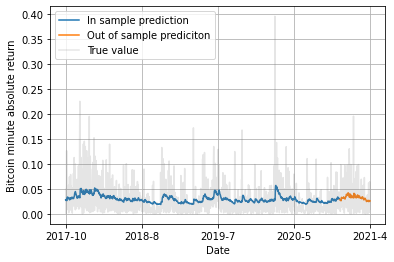

In [87]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#meilleur avec elon musk
tf.random.set_seed(1234)
df = df[['Close','Volume','date','elonmusk']]
df['date'] = pd.to_datetime(df['date'])

for reg in ['ret','price','abs']:
    if reg=='price':
        X = df[['Close']].values
        m = np.mean(X)
        s = np.std(X)
        X=(X-np.mean(X))/np.std(X-np.mean(X))
        y = X
    if reg=='ret':
        X = df[['Close']].values
        X=(X[1:,:]-X[:-1,:])/X[:-1,:]
        y = X
    if reg=='abs':
        X = df[['Close']].values
        X=np.abs((X[1:,:]-X[:-1,:])/X[:-1,:])
        y = X
    batch_size = 1
    time_steps = 50
    k = 0
    x_final = []
    y_final = []
    date = []
    for k in range(X.shape[0]-time_steps-1):
        x_final.append(X[k:k+time_steps,:])
        y_final.append(y[(k + time_steps + 1):(k + time_steps + 2), :])
        date.append(df.loc[k+time_steps+1, 'date'])
    x_final=np.stack(x_final)
    y_final=np.concatenate(y_final)
    
    tr = int(np.ceil(x_final.shape[0]*0.9))
    x_train = x_final[:tr,:,:]
    x_test = x_final[tr:,:,:]
    y_train = y_final[:tr,:]
    y_test = y_final[tr:,:]
    
    # problem => exploding gradient descent
    # set-up the model
    simple_lstm_model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64),
        tf.keras.layers.Dropout(0.2), 
        tf.keras.layers.Dense(64),
        tf.keras.layers.Dense(1)
    ])
    
    # compile the model
    #opt_adam = tf.keras.optimizers.Adam(lr=0.01, clipnorm=1.)
    #opt_adam = tf.keras.optimizers.Adam(lr=0.01, clipvalue=0.5)
    simple_lstm_model.compile(optimizer='Adam', loss='mse')
    
    EPOCHS = 5
    print('Training')
    print(f"######### {reg} ########")
    simple_lstm_model.fit(x=x_train,y=y_train, epochs=EPOCHS, validation_split=0.05)
    # in sample performance
    print('In sample performance')
    simple_lstm_model.evaluate(x_test,y_test)
    oos_pred = simple_lstm_model.predict(x_test)
    is_pred = simple_lstm_model.predict(x_train)
    if reg == 'price':
        is_pred=is_pred*s+m
        oos_pred=oos_pred*s+m
        y_final=y_final*s+m
        
    is_x = np.arange(0,tr)
    oos_x = np.arange(tr,x_final.shape[0])
    plt.plot(is_x,is_pred, label='In sample prediction')
    plt.plot(oos_x, oos_pred, label ='Out of sample prediciton')
    plt.plot(np.arange(0,x_final.shape[0]), y_final, label='True value', alpha=0.2, color ='grey')
    if reg == 'price':
        plt.ylabel('Bitcoin $ values')
    if reg == 'ret':
        plt.ylabel('Bitcoin minute return')
    if reg == 'abs':
        plt.ylabel('Bitcoin minute absolute return')

    a = np.ceil(np.linspace(0, len(date)-1,5)).astype(int)
    b = [str(date[x].year)+'-'+str(date[x].month) for x in a]
    plt.xticks(a, b)
    plt.xlabel('Date')
    plt.grid(True)
    plt.legend()

    plt.show()
    #plt.savefig(f'{reg}.png')